In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from numpy.linalg import inv,det
import pandas as pd
import random

band1 image size: (512, 512)


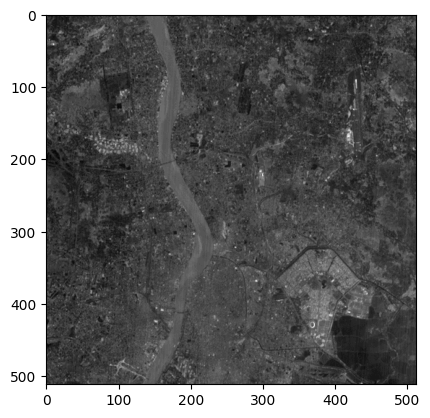

band2 image size: (512, 512)


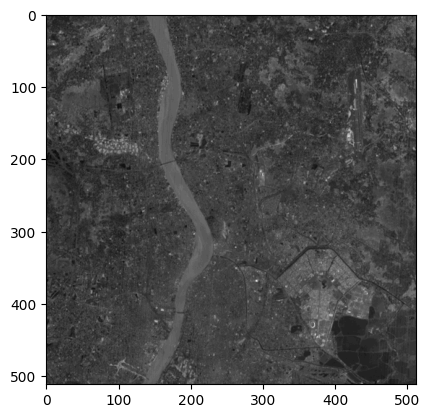

band3 image size: (512, 512)


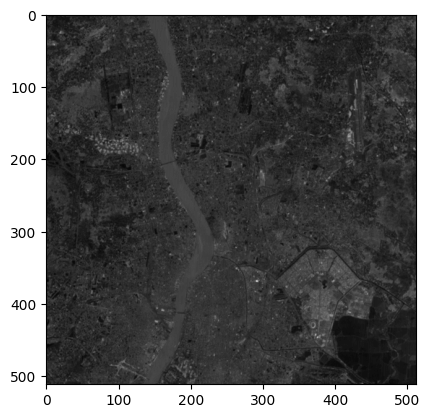

band4 image size: (512, 512)


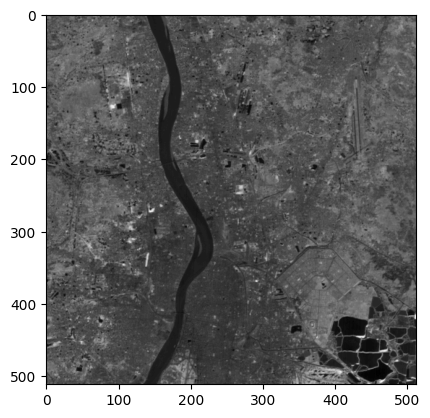

array([[95.25, 94.5 , 93.75, ..., 87.75, 88.5 , 88.5 ],
       [96.  , 96.  , 95.25, ..., 88.5 , 88.5 , 88.5 ],
       [96.  , 96.  , 94.5 , ..., 90.  , 88.5 , 88.5 ],
       ...,
       [88.5 , 87.  , 88.5 , ..., 80.25, 84.  , 81.75],
       [91.5 , 88.5 , 90.  , ..., 81.  , 87.  , 80.25],
       [93.  , 92.25, 92.25, ..., 82.5 , 87.  , 80.25]])

In [2]:
img_filename1 = 'data/band1.gif'
img1 = plt.imread(img_filename1).astype('double').mean(axis=2)
print('band1 image size: {}' .format(img1.shape))
plt.imshow(img1, cmap='gray')
plt.show()
img1


img_filename2 = 'data/band2.gif'
img2 = plt.imread(img_filename2).astype('double').mean(axis=2)
print('band2 image size: {}' .format(img2.shape))
plt.imshow(img2, cmap='gray')
plt.show()
img2

img_filename3 = 'data/band3.gif'
img3 = plt.imread(img_filename3).astype('double').mean(axis=2)
print('band3 image size: {}' .format(img3.shape))
plt.imshow(img3, cmap='gray')
plt.show()
img3

img_filename4 = 'data/band4.gif'
img4 = plt.imread(img_filename4).astype('double').mean(axis=2)
print('band4 image size: {}' .format(img4.shape))
plt.imshow(img4, cmap='gray')
plt.show()
img4



In [4]:
total_data = [img1, img2, img3, img4]

In [13]:
total_data = np.stack(total_data, axis=-1).reshape(-1, 4)

In [40]:
def assign_cluster(x,given_centroids):
    distances = []
    distances = np.linalg.norm(x[:, None] - given_centroids, axis=2)
    return np.argmin(distances, axis=1)
def centroid_update(x, k, min_dist_arg):
    new_centroids = np.empty((k, x.shape[1]))
    for i in range(k):
        points = x[min_dist_arg == i]
        new_centroids[i] = np.mean(points, axis=0)
    return new_centroids

In [62]:
def k_means(data,cluster,max_error=0.05):
    index = random.sample(range(0,data.shape[0]),cluster)
    centroids = data[index]
    error = max_error
    while(error >= max_error):
        old_cen = centroids
        clus_index = assign_cluster(data,centroids)
        centroids = centroid_update(data, cluster,clus_index)
        error = np.linalg.norm(old_cen - centroids)
    return centroids,clus_index


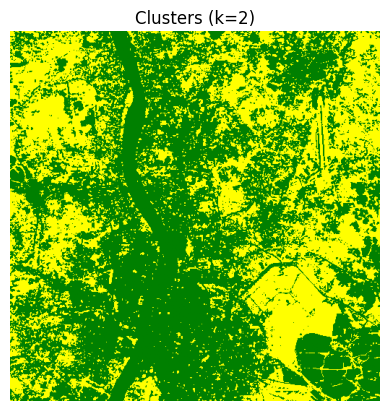

In [80]:
centroids,labels = k_means(total_data, 2)
clustered_image = labels.reshape(img1.shape)
colors = ['green','yellow']
rgba_colors = [plt.cm.colors.to_rgba(color) for color in colors]
clustered_image_colored = np.zeros((*img1.shape, 4))
for i in range(len(colors)):
    clustered_image_colored[clustered_image == i] = rgba_colors[i]

plt.imshow(clustered_image_colored)
plt.title(f"Clusters (k={2})")
plt.axis('off')
plt.show()

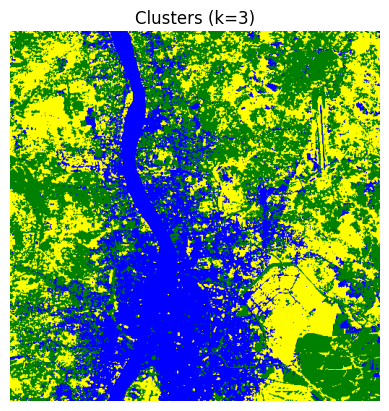

In [82]:
entroids,labels = k_means(total_data, 3)
clustered_image = labels.reshape(img1.shape)
colors = ['green','blue',"yellow"]
rgba_colors = [plt.cm.colors.to_rgba(color) for color in colors]
clustered_image_colored = np.zeros((*img1.shape, 4))
for i in range(len(colors)):
    clustered_image_colored[clustered_image == i] = rgba_colors[i]

plt.imshow(clustered_image_colored)
plt.title(f"Clusters (k={3})")
plt.axis('off')
plt.show()

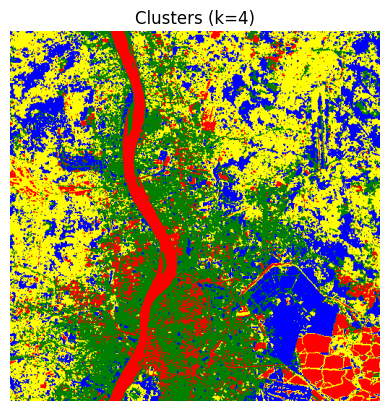

In [84]:
entroids,labels = k_means(total_data, 4)
clustered_image = labels.reshape(img1.shape)
colors = ['green','blue',"yellow","red"]
rgba_colors = [plt.cm.colors.to_rgba(color) for color in colors]
clustered_image_colored = np.zeros((*img1.shape, 4))
for i in range(len(colors)):
    clustered_image_colored[clustered_image == i] = rgba_colors[i]

plt.imshow(clustered_image_colored)
plt.title(f"Clusters (k={4})")
plt.axis('off')
plt.show()

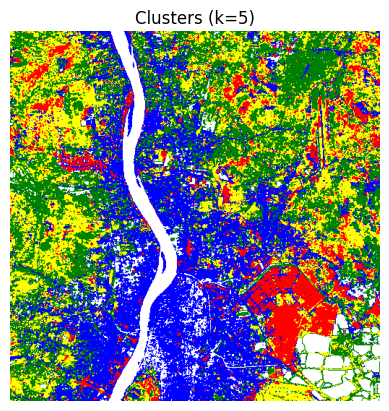

In [85]:
entroids,labels = k_means(total_data, 5)
clustered_image = labels.reshape(img1.shape)
colors = ['green','blue',"yellow","red","white"]
rgba_colors = [plt.cm.colors.to_rgba(color) for color in colors]
clustered_image_colored = np.zeros((*img1.shape, 4))
for i in range(len(colors)):
    clustered_image_colored[clustered_image == i] = rgba_colors[i]

plt.imshow(clustered_image_colored)
plt.title(f"Clusters (k={5})")
plt.axis('off')
plt.show()

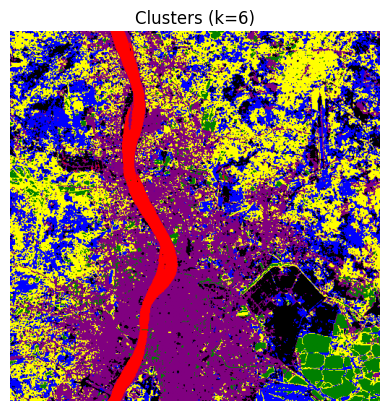

In [88]:
entroids,labels = k_means(total_data, 6)
clustered_image = labels.reshape(img1.shape)
colors = ['green','blue',"yellow","red","purple","black"]
rgba_colors = [plt.cm.colors.to_rgba(color) for color in colors]
clustered_image_colored = np.zeros((*img1.shape, 4))
for i in range(len(colors)):
    clustered_image_colored[clustered_image == i] = rgba_colors[i]

plt.imshow(clustered_image_colored)
plt.title(f"Clusters (k={6})")
plt.axis('off')
plt.show()